<a href="https://colab.research.google.com/github/gorogoro-uk/Machine-Learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis with Python

---

Task: 

Use Python to demonstrate exploratory data analysis techniques on a sample dataset.

Diabetes dataset from UCI Repository:

https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

In [53]:
# import modules
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# get dataset from UCI
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'
DATA_FILE = 'diabetes_data.txt'
urllib.request.urlretrieve(URL, DATA_FILE)

('diabetes_data.txt', <http.client.HTTPMessage at 0x7f11168d52e8>)

In [73]:
# import dataset into pandas dataframe
print(f"DATA_FILE: {DATA_FILE}")
df = pd.read_csv(DATA_FILE)
df.head()

DATA_FILE: diabetes_data.txt


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [75]:
# basic dataframe info
df.info()
# df.dtypes will show dataypes of columns only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

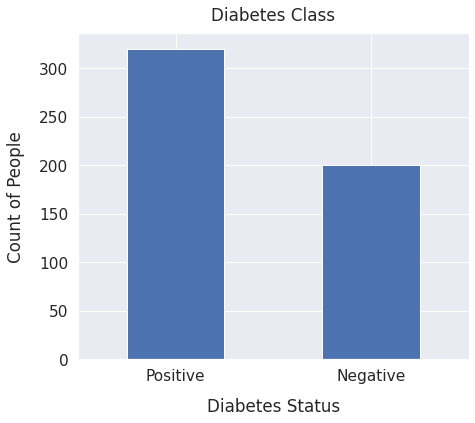

In [77]:
# histogram of target variable 'class'
sns.set(font_scale=1.4)
df['class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Status", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Diabetes Class", y=1.02);

In [79]:
# encode target variable 'class' as integers
df['class'] = df['class'].astype('category')
df['class_cat'] = df['class'].cat.codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 520 non-null    int64   
 1   Gender              520 non-null    object  
 2   Polyuria            520 non-null    object  
 3   Polydipsia          520 non-null    object  
 4   sudden weight loss  520 non-null    object  
 5   weakness            520 non-null    object  
 6   Polyphagia          520 non-null    object  
 7   Genital thrush      520 non-null    object  
 8   visual blurring     520 non-null    object  
 9   Itching             520 non-null    object  
 10  Irritability        520 non-null    object  
 11  delayed healing     520 non-null    object  
 12  partial paresis     520 non-null    object  
 13  muscle stiffness    520 non-null    object  
 14  Alopecia            520 non-null    object  
 15  Obesity             520 non-null    obje

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,class_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1


In [81]:
# encode categorical features as integers
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    df[col+'_cat'] = df[col].cat.codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     520 non-null    int64   
 1   Gender                  520 non-null    category
 2   Polyuria                520 non-null    category
 3   Polydipsia              520 non-null    category
 4   sudden weight loss      520 non-null    category
 5   weakness                520 non-null    category
 6   Polyphagia              520 non-null    category
 7   Genital thrush          520 non-null    category
 8   visual blurring         520 non-null    category
 9   Itching                 520 non-null    category
 10  Irritability            520 non-null    category
 11  delayed healing         520 non-null    category
 12  partial paresis         520 non-null    category
 13  muscle stiffness        520 non-null    category
 14  Alopecia                52

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,class_cat,Gender_cat,Polyuria_cat,Polydipsia_cat,sudden weight loss_cat,weakness_cat,Polyphagia_cat,Genital thrush_cat,visual blurring_cat,Itching_cat,Irritability_cat,delayed healing_cat,partial paresis_cat,muscle stiffness_cat,Alopecia_cat,Obesity_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
# print bar charts of all categorical features
sns.set(font_scale=1.0)
for col in df.select_dtypes(include=['category']).columns:
    print(col)
    df[col].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
    plt.ylabel("Count of People", labelpad=14)
    plt.title(col, y=1.02);
    plt.show()

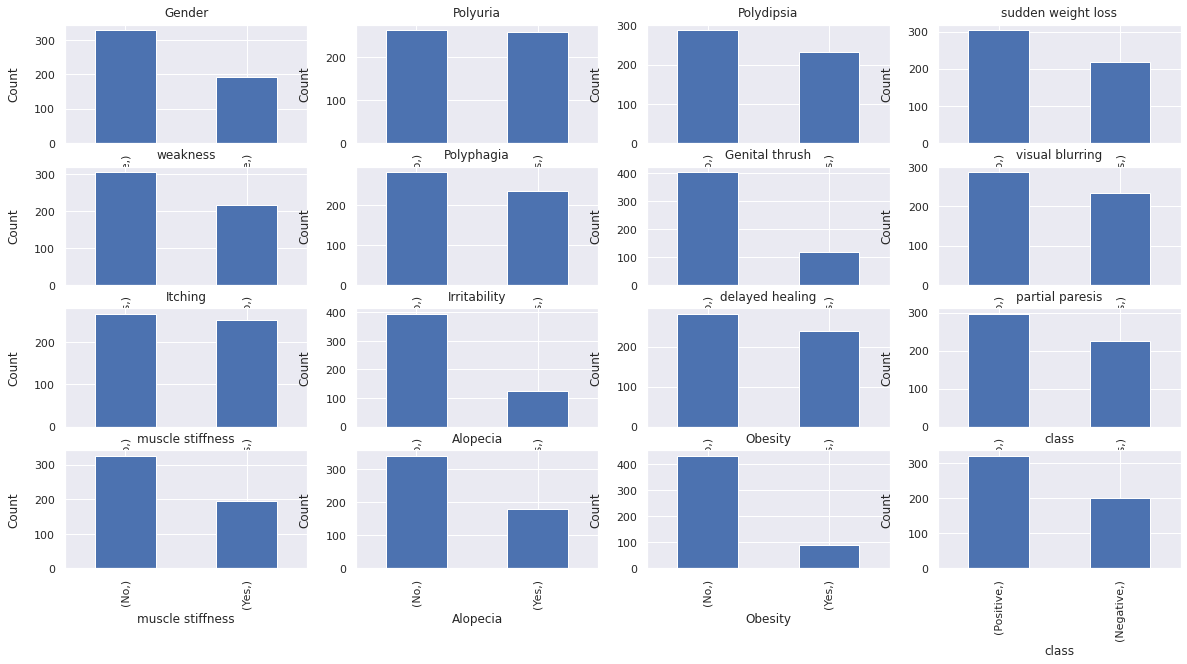

In [106]:
# plot categorical features
dfx = df.select_dtypes(include=['category'])
fig = plt.figure(figsize=(20,10))
sns.set(font_scale=1.0)
for i, c in enumerate(dfx.columns):
    ax=plt.subplot(4,4,i+1) 
    dfx[[c]].value_counts().plot(kind='bar', ax=ax)
    plt.ylabel("Count", labelpad=14)
    plt.title(c, y=1.02);
plt.show()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

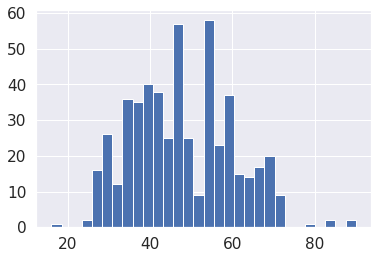

In [84]:
# histogram of numerical variable 'Age'
df['Age'].hist(bins=30)
df['Age'].describe()

**Build Model**

In [134]:
# split into train, test datasets
df.shape

X = df.select_dtypes(include=['int8'])
X = X.drop(columns='class_cat')
X_train = X.iloc[0:360]
X_test = X.iloc[360:]

y = df['class_cat']
y_train = y[0:360]
y_test = y[360:]

In [ ]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(random_state=0)

cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc_score')
#clf.fit(X_train, y_train)

In [169]:
# make prediction with model & asess fit
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, accuracy_score 

# Confusion Matrix
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
print(f"ROC curve:\n {fpr} {tpr} {thresholds}")
print()

# ROC AUC Score
print(f"ROC AUC Score:\n {roc_auc_score(y_test, y_pred)}")
print()

# Precision Recall Curve
precision, recall, thresholds2 = precision_recall_curve(y_test, y_pred, pos_label=2)
print(f"Precision Recall curve:\n {precision} {recall} {thresholds2}")
print()

# default scoring metric for logreg is average accuracy
print(f" Average Accuracy Score:  {clf.score(X_test, y_test)}")
print(f" Accuracy Score:  {accuracy_score(y_test, y_pred)}")
print(f" Log Loss Score:  {log_loss(y_test, y_pred)}")
print()

Confusion Matrix:
 [[78  7]
 [ 4 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        85
           1       0.91      0.95      0.93        75

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160

ROC curve:
 [0.     0.4875 1.    ] [nan nan nan] [2 1 0]

ROC AUC Score:
 0.9321568627450981

Precision Recall curve:
 [0. 1.] [nan  0.] [1]

 Average Accuracy Score:  0.93125
 Accuracy Score:  0.93125
 Log Loss Score:  2.374575859537681



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


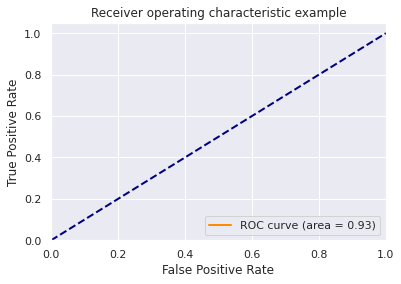

In [171]:
# plot ROC Curve
import matplotlib.pyplot as plt

# get data
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = roc_auc_score(y_test, y_pred)

# plot chart
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()